# Final Project

### Q1. Your views about the problem statement?

The problem statement is very detailed and easy to understand.


### Q2. What will be your approach to solving this task?

My approach to solving this task is as below:
* Import the necessary libraries
* Import the data
* Visualize the data
* Do the pre-processing on the data
* Again visualize the data
* Mention the dependent and independent variables
* Split the data for Train and Test
* Train and test available models
* Based on the model's performance conclude which model is best suited


### Q3. What were the available ML model options you had to perform this task?

The following are the ML model options available for performing this task:
* Linear Regression
* OLS
* Ridge
* Lasso

The following are the ML model options available but not they cannot be used to perform this task.
Since, these methods are for the problems with two or more class values for the dependent variable(not continuous).
* Classification and Regression Trees
* K-Nearest Neighbors (KNN)
* Bagging
* Random Forest
* Grid Search
* Gradient Boosting
* Ada Boost
* Logistic Regression 



### Q4. Which model’s performance is best and what could be the possible reason for that?

Based on the r2_score value, Ridge regression is best.

* r2 score for OLS is 0.534

* r2 score for linear regression is 0.5383333027569247


* #### r2 score for Ridge is 0.5400624767491193


* r2 score for Lasso is 0.5396891770372774


### Q5. What steps can you take to improve this selected model’s performance even further?


To improve the selected model's performance, will train and test with different random samples.


## Import the necessary libraries

In [512]:
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sma
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix


## Load the data from the following CSV file
* ML case Study 
* Cities
* Colleges

In [514]:
fp_df = pd.read_csv("ML case Study.csv", header=0)
cities_data = pd.read_csv("cities.csv", header=0)
college_data = pd.read_csv("Colleges.csv", header=0)

## Print the details of the data
* Number of rows and columns
* First five rows
* EDD
* Information about the variables

In [516]:
df_list = [fp_df, cities_data, college_data]

In [517]:
for item in range(3):
    print("Number of rows and columns are:")
    print(df_list[item].shape)
    print("Top 5 rows are:")
    print(df_list[item].head())
    print("EDD:")
    print(df_list[item].describe())
    print("Information about the variables are:")
    print(df_list[item].info())

Number of rows and columns are:
(1589, 8)
Top 5 rows are:
             College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10  
EDD:
       Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
count   1589.000000          1589.000000       1589.000000  1589.0000

## Missing values treatment.

Since the number of rows of the data frame and the number of entries for each column are equal.
We can conclude that there are no missing values.

### Create Dummy Variables

In this step we need to convert all the columns with categorical values to numerical values.
College, City, and  Role are the 3 columns with categorical values.
For the College we assign numbers 1, 2, or 3 based on whether the college belongs to Tier 1, Tier 2, or Tier 3 respectively.
For the City column we assign numbers 0, and 1 based on whether the it is a Metro city or Non-Metro City respectively.
For the Role column we create a dummy variable using get_dummies method.

Print the first 5 rows from the college_data

In [521]:
college_data.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


Convert the each of the columns present in college_data to a separate list.

In [523]:
Tier1 = college_data["Tier 1"].tolist()
Tier2 = college_data["Tier 2"].tolist()
Tier3 = college_data["Tier 3"].tolist()

Below code checks if the college belongs to which tier and then replaces the college name with numeric values 1, 2, or 3.

In [525]:
for item in fp_df.College:
    if item in Tier1:
        fp_df["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        fp_df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        fp_df["College"].replace(item,3,inplace=True)

Print the first 10 rows from the fp_df to check if the categorical value for the column College is changed to numerical value

In [527]:
fp_df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10
5,2,Kolhapur,Executive,54340.0,4,73,31,59950.89
6,3,Surat,Executive,60298.0,1,42,46,66602.34
7,2,Delhi,Executive,49944.0,2,56,37,57768.44
8,3,Chennai,Executive,53124.0,4,40,37,70083.30
9,1,Kolhapur,Executive,51141.0,1,47,60,85648.48


In [528]:
cities_data.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


Convert the each of the columns present in cities_data to a separate list.

In [530]:
Metro = cities_data["Metrio City"].tolist()
Non_Metro = cities_data["non-metro cities"].tolist()

Below code checks if the city is a metro city or non-metro and then replaces the city name with numeric values 0 or 1.

In [532]:
for item in fp_df.City:
    if item in Metro:
        fp_df["City"].replace(item,0,inplace=True)
    elif item in Non_Metro:
        fp_df["City"].replace(item,1,inplace=True)

Print the first 10 rows from the fp_df to check if the categorical value for the column City is changed to numerical value

In [534]:
fp_df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,1,Manager,55523.0,3,66,19,71406.58
1,2,1,Executive,57081.0,1,84,18,68005.87
2,3,1,Executive,60347.0,2,52,28,76764.02
3,3,1,Executive,49010.0,2,81,33,82092.39
4,1,1,Executive,57879.0,4,74,32,73878.10
5,2,1,Executive,54340.0,4,73,31,59950.89
6,3,0,Executive,60298.0,1,42,46,66602.34
7,2,0,Executive,49944.0,2,56,37,57768.44
8,3,0,Executive,53124.0,4,40,37,70083.30
9,1,1,Executive,51141.0,1,47,60,85648.48


In [535]:
fp_df = pd.get_dummies(data=fp_df, drop_first=True, dtype=int)

In [536]:
fp_df.head(10)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,1,55523.0,3,66,19,71406.58,1
1,2,1,57081.0,1,84,18,68005.87,0
2,3,1,60347.0,2,52,28,76764.02,0
3,3,1,49010.0,2,81,33,82092.39,0
4,1,1,57879.0,4,74,32,73878.10,0
5,2,1,54340.0,4,73,31,59950.89,0
6,3,0,60298.0,1,42,46,66602.34,0
7,2,0,49944.0,2,56,37,57768.44,0
8,3,0,53124.0,4,40,37,70083.30,0
9,1,1,51141.0,1,47,60,85648.48,0


### Check the correlation between the variables

In [538]:
fp_df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,0.014946,1.000000,-0.004644,-0.051670,0.018616,0.023613,0.020365,0.048671
Previous CTC,0.041979,-0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,-0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


### Correlation Analysis

Based on the output of fp_df.corr(),
We see that graduation marks is not related to CTC.
Also, College and City has very low correlation with CTC.

### Outliers Treatment

I have used Flooring and capping method for Outliers Treatment.

Outliers treatment is done only for the column "Previous CTC".

Since the standard deviation is high only for this column.
Also, the difference between the mean and the 50th percentile value is significantly higher.

In [542]:
uv = np.percentile(fp_df['Previous CTC'],[99])[0]

In [543]:
print(uv)

71506.92


In [544]:
fp_df[fp_df['Previous CTC'] > uv]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
116,3,0,77911.0,1,50,58,87831.62,0
292,3,1,74198.0,1,57,25,99644.51,1
543,1,0,73856.0,1,75,54,121362.73,1
572,1,0,71543.0,4,82,30,61366.78,0
701,2,1,71549.0,4,47,50,83116.21,0
847,1,0,71756.0,4,67,23,72141.43,0
860,1,0,75785.0,4,63,37,110338.25,1
941,3,0,72319.0,1,51,50,63538.43,0
1024,1,0,72661.0,3,74,47,70238.70,0
1047,1,1,73214.0,4,57,22,100119.53,1


In [545]:
fp_df[fp_df['Previous CTC'] > 3*uv]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager


Since there is no rows that is greater than 3 times the 99th percentile, we do not have to modify any rows.

In [547]:
lv = np.percentile(fp_df['Previous CTC'],[1])[0]

In [548]:
print(lv)

41587.92


In [549]:
fp_df[fp_df['Previous CTC'] < lv]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
28,2,0,39636.0,3,43,23,59230.44,0
98,1,1,41228.0,2,64,56,87418.05,1
99,1,1,40945.0,1,46,38,74984.02,1
172,3,1,38709.0,3,56,18,72747.12,0
395,1,0,41294.0,1,39,46,71733.25,0
410,1,1,38605.0,1,38,19,69365.78,0
428,1,0,36990.0,2,43,21,65008.02,0
613,1,1,40574.0,2,66,34,62314.99,0
684,1,0,40632.0,2,61,33,71017.54,0
994,1,1,40365.0,3,54,27,68402.56,1


In [550]:
fp_df[fp_df['Previous CTC'] < 0.3*lv]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager


Since there is no rows that is lesser than 0.3 times the 1st percentile, we do not have to modify any rows.

## Data Vizuvalisation

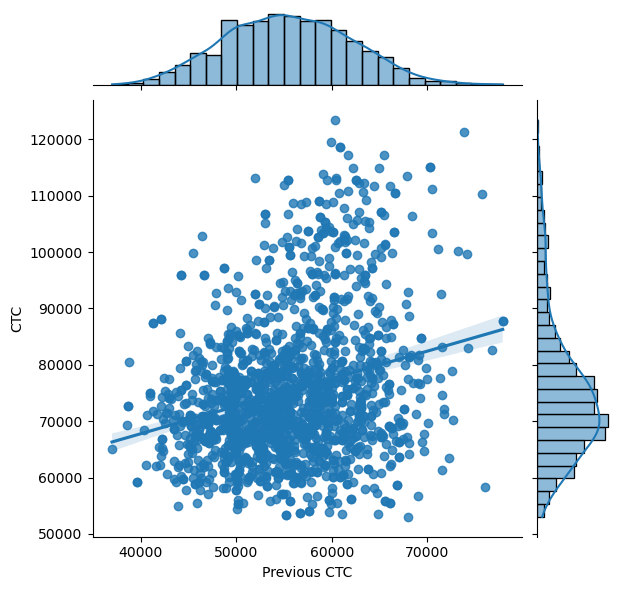

In [553]:
sb.jointplot(x='Previous CTC', y='CTC', data=fp_df, kind = 'reg')

### Number of employees from Tier 1, Tier 2, and Tier 3 Colleges.

* 1 represents employees from Tier 1 college.
* 2 represents employees from Tier 2 college.
* 3 represents employees from Tier 3 college.

<Axes: xlabel='College', ylabel='count'>

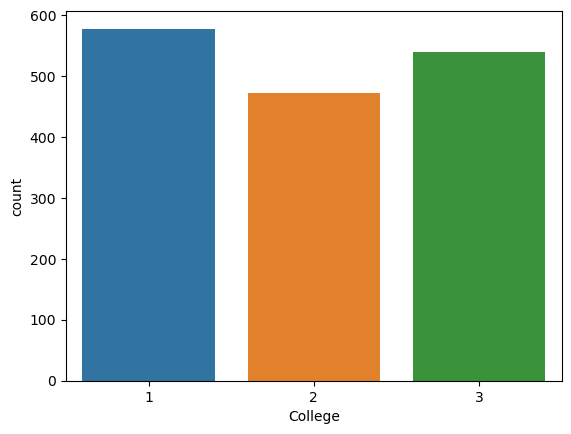

In [555]:
sb.countplot(x='College', data=fp_df)

### Number of employees from Metro and Non-Metro cities

* 0 represents employees from Metro cities.
* 1 represents employees from Non-Metro cities.

<Axes: xlabel='City', ylabel='count'>

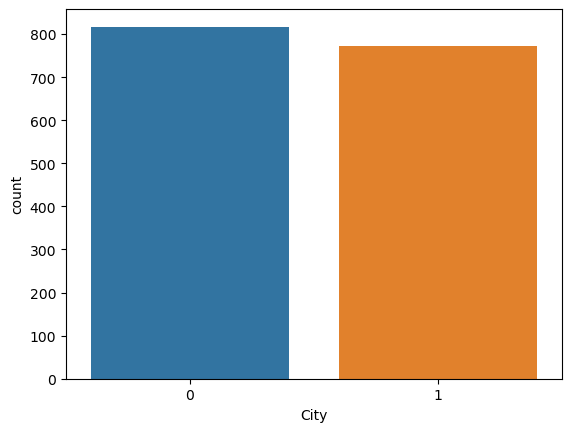

In [557]:
sb.countplot(x='City', data=fp_df)

### Below graph shows how previous job change is related to CTC

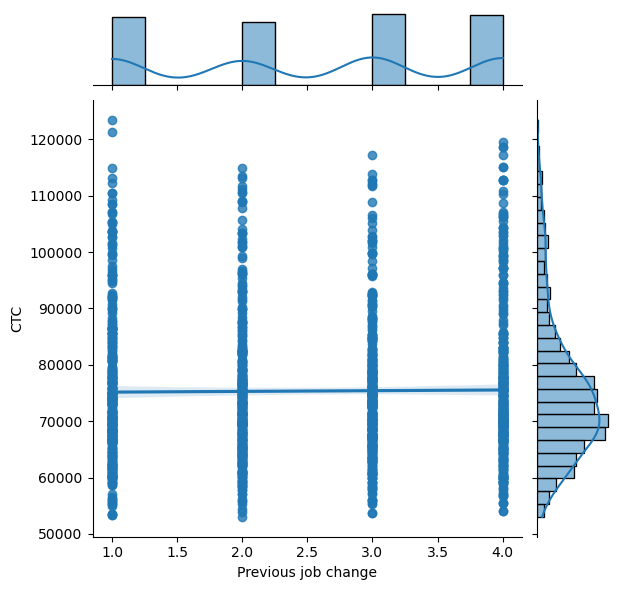

In [559]:
sb.jointplot(x='Previous job change', y='CTC', data=fp_df, kind = 'reg')

### Below graph shows how graduation marks is related to CTC

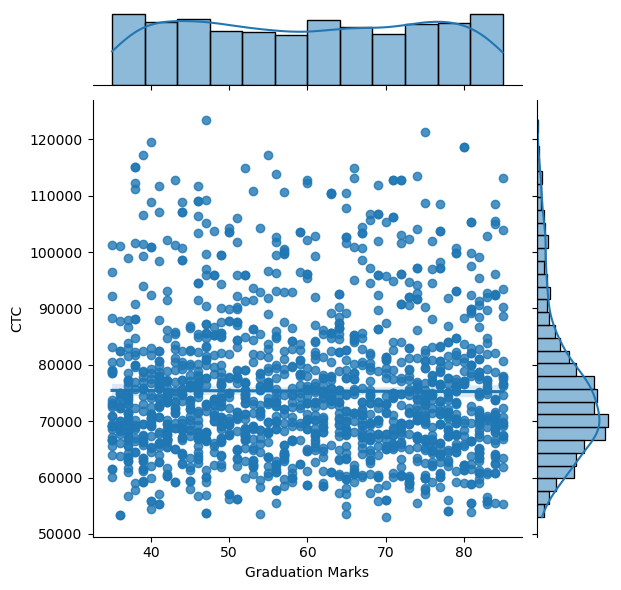

In [561]:
sb.jointplot(x='Graduation Marks', y='CTC', data=fp_df, kind = 'reg')

### Below graph shows how experience in months is related to CTC.

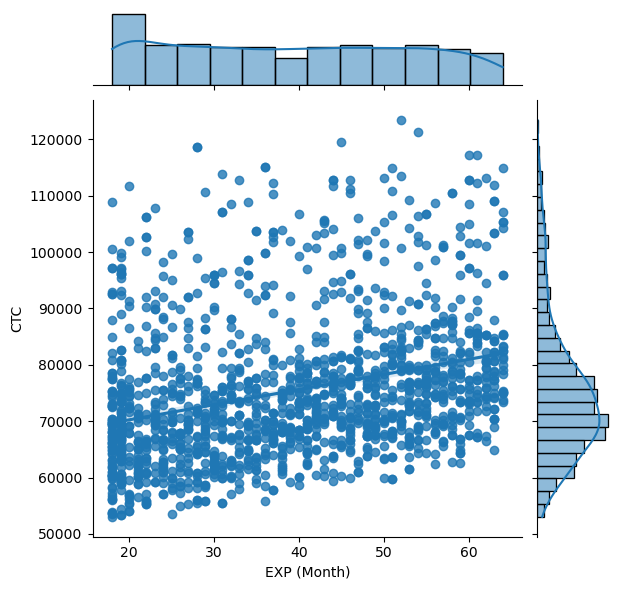

In [563]:
sb.jointplot(x='EXP (Month)', y='CTC', data=fp_df, kind = 'reg')

#### Below are a few observations based on the data vizualisations.

* Previous CTC increases, then CTC also increases.
* Graduation Marks, previous job change has no effect on the CTC.
* Experience in month increases, then CTC also increases.


### Below graph shows number of employees in Executive role and Manager role

* 0 represents executive role
* 1 represents manager role

<Axes: xlabel='Role_Manager', ylabel='count'>

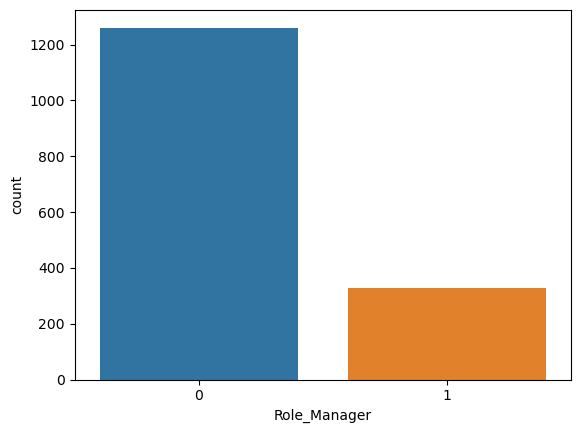

In [566]:
sb.countplot(x='Role_Manager', data=fp_df)

### Split the Dependent and Independent variables.

Here all the columns except CTC are independent variables and CTC is the dependent variable.

In [568]:
X = fp_df.drop("CTC",axis=1)

Print the first 5 rows of the independent variable X

In [570]:
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,1,55523.0,3,66,19,1
1,2,1,57081.0,1,84,18,0
2,3,1,60347.0,2,52,28,0
3,3,1,49010.0,2,81,33,0
4,1,1,57879.0,4,74,32,0


Print the shape of the independent variable X

In [572]:
X.shape

(1589, 7)

In [573]:
y = fp_df['CTC']
type(y)

pandas.core.series.Series

Print the first 5 rows of the dependent variable y

In [575]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

Print the shape of the dependent variable y

In [577]:
y.shape

(1589,)

# Linear Regression

OLS Method

In [579]:
X_cons = sma.add_constant(X)

In [580]:
X_cons.head()

,const,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,1.0,2,1,55523.0,3,66,19,1
1,1.0,2,1,57081.0,1,84,18,0
2,1.0,3,1,60347.0,2,52,28,0
3,1.0,3,1,49010.0,2,81,33,0
4,1.0,1,1,57879.0,4,74,32,0


In [581]:
np.asarray(fp_df['CTC'])

array([71406.58, 68005.87, 76764.02, ..., 70186.19, 73394.09, 70056.31])

In [582]:
np.asarray(X_cons)

array([[ 1.,  2.,  1., ..., 66., 19.,  1.],
       [ 1.,  2.,  1., ..., 84., 18.,  0.],
       [ 1.,  3.,  1., ..., 52., 28.,  0.],
       ...,
       [ 1.,  1.,  0., ..., 60., 19.,  0.],
       [ 1.,  1.,  1., ..., 67., 29.,  0.],
       [ 1.,  2.,  0., ..., 75., 18.,  1.]])

In [583]:
np.asarray(y)

array([71406.58, 68005.87, 76764.02, ..., 70186.19, 73394.09, 70056.31])

In [584]:
lr_multi = sma.OLS(fp_df.CTC, X_cons).fit()

In [585]:
lr_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          4.70e-257
Time:                        14:47:54   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 3.88e+04   2190.177     17.716      0.000    3.45e+04    4.31e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                 -380.8308    433.455     -0.879      0.380   -1231.039     469.377
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [586]:
lm3 = LinearRegression()

In [587]:
lm3.fit(X_cons, y)

LinearRegression()

In [588]:
print(lm3.intercept_, lm3.coef_)

38801.94059364109 [ 0.00000000e+00 -4.81514705e+02 -3.80830787e+02  4.10090279e-01
  1.26565295e+02  6.23621203e+00  2.61344394e+02  1.94874279e+04]


## Split the data for Train and Test

In [590]:
X_train, X_test, y_train, y_test = train_test_split(X_cons, y,test_size=0.2,random_state=1)

In [591]:
X_train.head()

,const,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
142,1.0,1,0,47481.0,4,42,34,1
1224,1.0,3,1,44974.0,2,61,41,0
736,1.0,3,1,64762.0,1,63,37,1
620,1.0,3,0,55650.0,4,75,30,0
1492,1.0,1,1,55308.0,2,36,40,0


In [592]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


In [593]:
X_test.head()

,const,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
1586,1.0,1,0,44907.0,1,60,19,0
772,1.0,3,0,62913.0,4,55,44,0
1024,1.0,1,0,72661.0,3,74,47,0
1243,1.0,2,1,55183.0,2,78,28,0
640,1.0,2,0,65363.0,3,79,33,0


In [594]:
y_train.head()

142     77150.63
1224    62808.80
736     89205.84
620     62505.95
1492    75028.75
Name: CTC, dtype: float64

In [595]:
y_test.head()

1586    70186.19
772     81307.63
1024    70238.70
1243    64495.67
640     73418.48
Name: CTC, dtype: float64

### Model Performance

In [597]:
lm3.fit(X_train, y_train)

LinearRegression()

In [598]:
y_train_pred = lm3.predict(X_train)

In [599]:
y_test_pred = lm3.predict(X_test)

In [600]:
r2_score(y_train, y_train_pred)

0.5321415278347941

In [601]:
r2_score(y_test, y_test_pred)

0.5383333027569247

## Ridge Regression

In [603]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [604]:
X_train_s = scaler.transform(X_train)

In [605]:
X_test_s = scaler.transform(X_test)

In [606]:
lr_ridge = Ridge(alpha=0.5)

In [607]:
lr_ridge.fit(X_train_s, y_train)

Ridge(alpha=0.5)

In [608]:
r2_score(y_test, lr_ridge.predict(X_test_s))

0.5383709574503687

In [609]:
param_range = np.logspace(-2, 8, 100)

In [610]:
train_scores, test_scores = validation_curve(estimator=Ridge(), X=X_train_s, y=y_train, param_name="alpha", param_range=param_range, scoring="r2")

In [611]:
print(train_scores)

[[5.61494600e-01 5.50908665e-01 5.27760938e-01 5.12636494e-01
  5.11293133e-01]
 [5.61494600e-01 5.50908665e-01 5.27760937e-01 5.12636494e-01
  5.11293133e-01]
 [5.61494600e-01 5.50908665e-01 5.27760937e-01 5.12636494e-01
  5.11293133e-01]
 [5.61494599e-01 5.50908665e-01 5.27760937e-01 5.12636494e-01
  5.11293133e-01]
 [5.61494599e-01 5.50908664e-01 5.27760937e-01 5.12636494e-01
  5.11293133e-01]
 [5.61494599e-01 5.50908664e-01 5.27760937e-01 5.12636494e-01
  5.11293133e-01]
 [5.61494599e-01 5.50908664e-01 5.27760937e-01 5.12636493e-01
  5.11293132e-01]
 [5.61494598e-01 5.50908663e-01 5.27760936e-01 5.12636493e-01
  5.11293132e-01]
 [5.61494598e-01 5.50908663e-01 5.27760935e-01 5.12636492e-01
  5.11293131e-01]
 [5.61494596e-01 5.50908661e-01 5.27760934e-01 5.12636491e-01
  5.11293130e-01]
 [5.61494594e-01 5.50908659e-01 5.27760932e-01 5.12636489e-01
  5.11293128e-01]
 [5.61494591e-01 5.50908656e-01 5.27760928e-01 5.12636486e-01
  5.11293124e-01]
 [5.61494586e-01 5.50908650e-01 5.277609

In [612]:
print(test_scores)

[[ 3.70167497e-01  4.25260054e-01  5.39775728e-01  6.04919140e-01
   6.02165525e-01]
 [ 3.70167964e-01  4.25260659e-01  5.39775605e-01  6.04918826e-01
   6.02165312e-01]
 [ 3.70168554e-01  4.25261423e-01  5.39775450e-01  6.04918430e-01
   6.02165042e-01]
 [ 3.70169298e-01  4.25262387e-01  5.39775254e-01  6.04917931e-01
   6.02164702e-01]
 [ 3.70170237e-01  4.25263603e-01  5.39775006e-01  6.04917300e-01
   6.02164273e-01]
 [ 3.70171422e-01  4.25265137e-01  5.39774694e-01  6.04916505e-01
   6.02163731e-01]
 [ 3.70172918e-01  4.25267073e-01  5.39774300e-01  6.04915501e-01
   6.02163048e-01]
 [ 3.70174804e-01  4.25269515e-01  5.39773802e-01  6.04914235e-01
   6.02162185e-01]
 [ 3.70177185e-01  4.25272597e-01  5.39773174e-01  6.04912636e-01
   6.02161096e-01]
 [ 3.70180188e-01  4.25276486e-01  5.39772382e-01  6.04910619e-01
   6.02159723e-01]
 [ 3.70183978e-01  4.25281392e-01  5.39771381e-01  6.04908074e-01
   6.02157988e-01]
 [ 3.70188758e-01  4.25287581e-01  5.39770118e-01  6.04904861e-01

In [613]:
train_mean = np.mean(train_scores, axis = 1)

In [614]:
test_mean = np.mean(test_scores, axis = 1)

In [615]:
max(test_mean)

0.5089311561374406

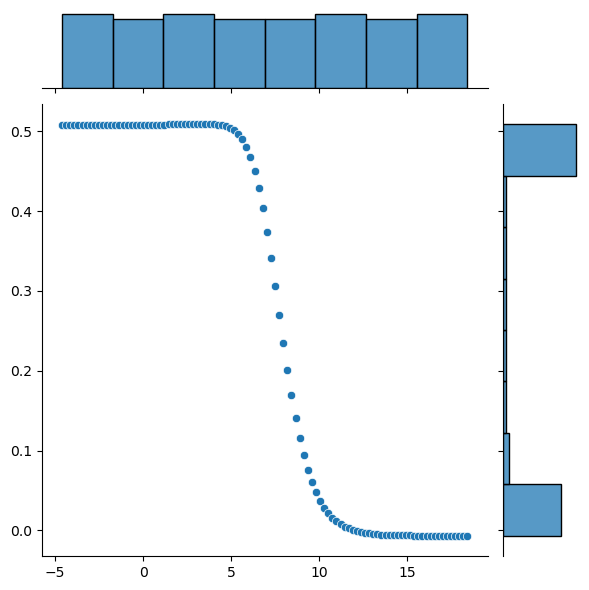

In [616]:
sb.jointplot(x=np.log(param_range), y=test_mean)

In [617]:
np.where(test_mean==max(test_mean))

(array([34]),)

In [618]:
alpha_value = param_range[34]

In [619]:
lr_ridge_best = Ridge(alpha=alpha_value)

In [620]:
lr_ridge_best.fit(X_train_s, y_train)

Ridge(alpha=27.1858824273294)

In [621]:
r2_score(y_test, lr_ridge_best.predict(X_test_s))

0.5400624767491193

In [622]:
r2_score(y_train, lr_ridge_best.predict(X_train_s))

0.5319076489078044

## Lasso Regression

In [624]:
lr_lasso = Lasso(alpha=alpha_value)

In [625]:
lr_lasso.fit(X_train_s, y_train)

Lasso(alpha=27.1858824273294)

In [626]:
r2_score(y_test, lr_lasso.predict(X_test_s))

0.5396891770372774